In [21]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [22]:
X,y = load_diabetes(return_X_y=True)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
from sklearn.linear_model import Ridge

In [24]:
reg = Ridge(alpha=0.1,solver='cholesky')
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [25]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.46931288533098037

In [26]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [27]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [28]:
reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.46931288533098037
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


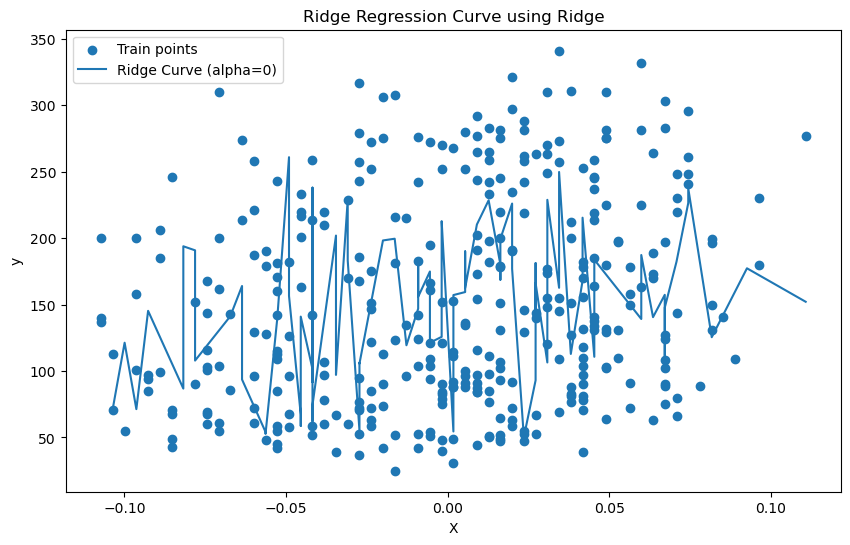

In [53]:
reg = Ridge(alpha=0)
reg.fit(X_train, y_train)

# Sort X_test for clean curve
idx = np.argsort(X_test[:, 0])
X_sorted = X_test[idx]

# Predict
y_pred_sorted = reg.predict(X_sorted)

# Plot
plt.figure(figsize=(10, 6))

# Scatter actual points
plt.scatter(X_train[:, 0], y_train, label="Train points")

# Curve line
plt.plot(X_sorted[:, 0], y_pred_sorted, label=f"Ridge Curve (alpha={reg.alpha})")

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression Curve using Ridge")
plt.show()

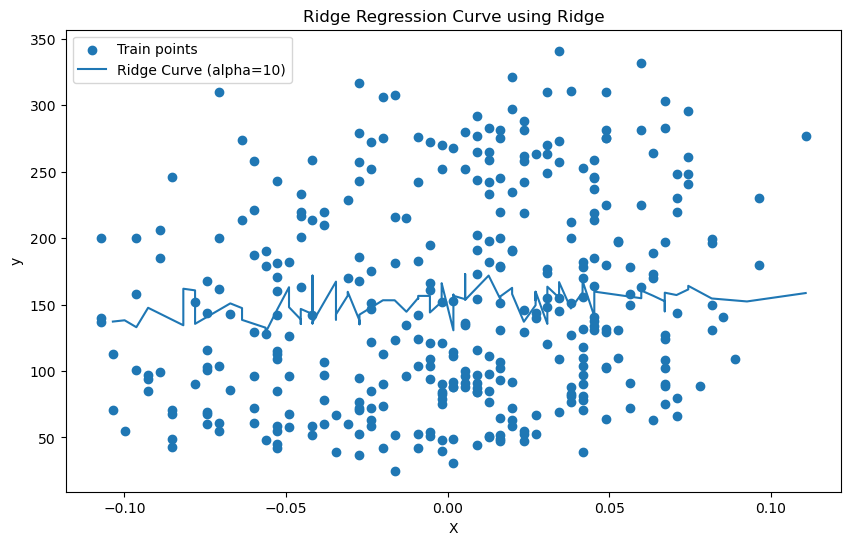

In [54]:
reg = Ridge(alpha=10)
reg.fit(X_train, y_train)

# Sort X_test for clean curve
idx = np.argsort(X_test[:, 0])
X_sorted = X_test[idx]

# Predict
y_pred_sorted = reg.predict(X_sorted)

# Plot
plt.figure(figsize=(10, 6))

# Scatter actual points
plt.scatter(X_train[:, 0], y_train, label="Train points")

# Curve line
plt.plot(X_sorted[:, 0], y_pred_sorted, label=f"Ridge Curve (alpha={reg.alpha})")

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression Curve using Ridge")
plt.show()

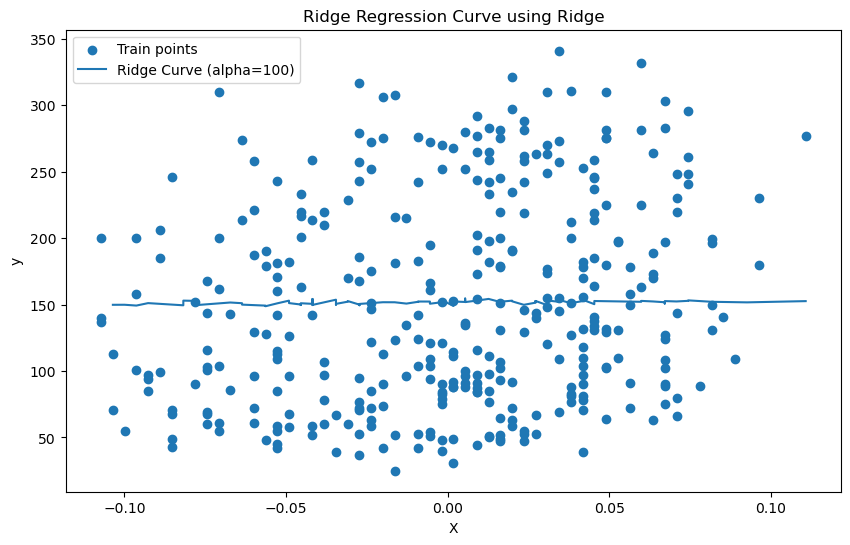

In [55]:
reg = Ridge(alpha=100)
reg.fit(X_train, y_train)

# Sort X_test for clean curve
idx = np.argsort(X_test[:, 0])
X_sorted = X_test[idx]

# Predict
y_pred_sorted = reg.predict(X_sorted)

# Plot
plt.figure(figsize=(10, 6))

# Scatter actual points
plt.scatter(X_train[:, 0], y_train, label="Train points")

# Curve line
plt.plot(X_sorted[:, 0], y_pred_sorted, label=f"Ridge Curve (alpha={reg.alpha})")

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression Curve using Ridge")
plt.show()
